## Q1. What are the key features of the wine quality data set? Discuss the importance of each feature in predicting the quality of wine.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_wine = pd.read_csv('winequality-red.csv')

df_wine.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


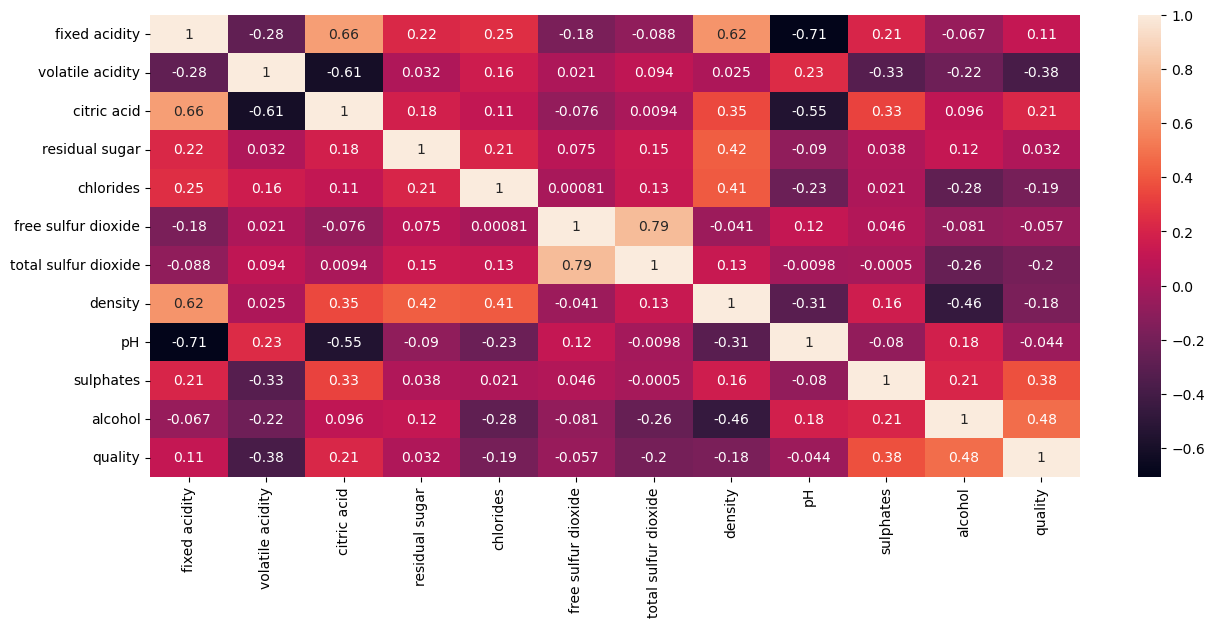

In [5]:
plt.figure(figsize=(15,6))
sns.heatmap(df_wine.corr(method='spearman'), annot=True)
plt.show()

#### <b>What are the key features of the wine quality data set?</b>

From above plot, observing the correlation between all the feature with 'quality' feature, we can draw:

* 'quality' is related to 'alcohol', 'sulphates' - in postive manner.
* 'quality' is related to 'volatile acidity' & 'density' - in negative manner. 

> So, those six features will be the 'key features' to take in predicting the quality of the wine.

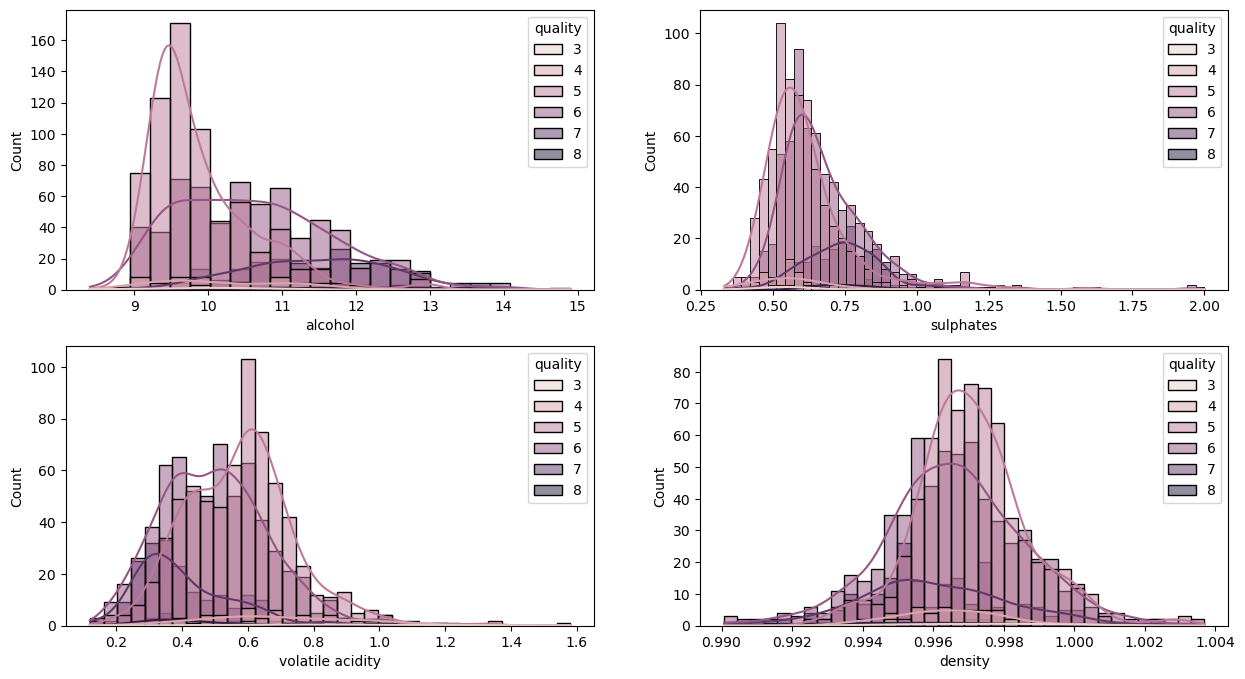

In [14]:
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
sns.histplot(data=df_wine, x='alcohol', hue='quality', kde=True)
plt.subplot(2,2,2)
sns.histplot(data=df_wine, x='sulphates', hue='quality', kde=True)
plt.subplot(2,2,3)
sns.histplot(data=df_wine, x='volatile acidity', hue='quality', kde=True)
plt.subplot(2,2,4)
sns.histplot(data=df_wine, x='density', hue='quality', kde=True)
plt.show()

#### <b>Discuss the importance of each key feature in predicting the quality of wine.</b>


From Above Correlation heatmap and histogram, we can come to the conclusion:

* The More amount of 'alcohol' and 'sulphate', the better the 'qualty' of the wine.
* The less the amount of 'volatile acidity' and 'density' -- the better the ''quality of the wine.

Sources to read from about the EDA for Red Wine Dataset:
    
1. https://www.kaggle.com/code/vipin20/step-by-guide-to-predict-red-wine-quality-eda
2. https://medium.com/@shreyasrivastav26/exploratory-data-analysis-on-wine-data-set-46ff17a42cd4
3. https://www.kaggle.com/code/hassanamin/exploratory-data-analysis-aka-eda-on-red-wine-data

## Q2. How did you handle missing data in the wine quality data set during the feature engineering process? Discuss the advantages and disadvantages of different imputation techniques.


* There is no missing data present in the wine quality dataset. Below is the code snippet I used to do the analysis to find out the missing data and as you can all 12 'feature' have '0' missing data.

In [15]:
df_wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

#### <b>Discuss the advantages and disadvantages of different imputation techniques.</b>

1. <b>Complete Case Analysis(CCA):</b>

    This is a quite straightforward method of handling the Missing Data, which directly removes the rows that have missing data i.e we consider only those rows where we have complete data i.e data is not missing. This method is also popularly known as “Listwise deletion”.
    
    <u>Advantages</u>:-

      * Easy to implement.
      * No Data manipulation required.

    <u>Limitations</u>:-

      * Deleted data can be informative.
      * Can lead to the deletion of a large part of the data.
      * Can create a bias in the dataset, if a large amount of a particular type of variable is deleted from it.
      * The production model will not know what to do with Missing data.

<br>

2. <b>Arbitrary Value Imputation:</b>

    This is an important technique used in Imputation as it can handle both the Numerical and Categorical variables. This technique states that we group the missing values in a column and assign them to a new value that is far away from the range of that column. Mostly we use values like 99999999 or -9999999 or “Missing” or “Not defined” for numerical & categorical variables.
    
    <u>Advantages</u>:-

      * Easy to implement.
      * We can use it in production.
      * It retains the importance of “missing values” if it exists.

    <u>Disadvantages</u>:-

      * Can distort original variable distribution.
      * Arbitrary values can create outliers.
      * Extra caution required in selecting the Arbitrary value.

<br>

3. <b>Frequent Category Imputation</b>:

    This technique says to replace the missing value with the variable with the highest frequency or in simple words replacing the values with the Mode of that column. This technique is also referred to as Mode Imputation.
    
    <u>Advantages</u>:-

     * Implementation is easy.
     * We can obtain a complete dataset in very little time.
     * We can use this technique in the production model.

     <u>Disadvantages</u>:-

      * The higher the percentage of missing values, the higher will be the distortion.
      * May lead to over-representation of a particular category.
      * Can distort original variable distribution.

<br>


4. <b>Statistical Values Imputation</b>: (Advantages and Disadvantages altogether explained)

    This is done using statistical values like mean, median. However, none of these guarantees unbiased data, especially if there are many missing values.
    
    Mean is most useful when the original data is not skewed, while the median is more robust, not sensitive to outliers, and thus used when data is skewed.
    
    In a normally distributed data, one can get all the values that are within 2 standard deviations from the mean. Next, fill in the missing values by generating random numbers between (mean — 2 std) & (mean + 2 std)



Source: https://www.kaggle.com/code/azminetoushikwasi/all-imputation-techniques-with-pros-and-cons

## Q3. What are the key factors that affect students' performance in exams? How would you go about analyzing these factors using statistical techniques?


* As per the analysis done by me, I think 'parental_level_of_education' and 'lunch' are two key factors that affect the students performance in exam.

* I used seaborn histplot to plot average score of the students and mark them as per 'parental_level_of_education' and 'lunch' in two separate plots with 'kde=True' and I analyzed the distribution of the data to come to the conclusion. The plot shown in below.


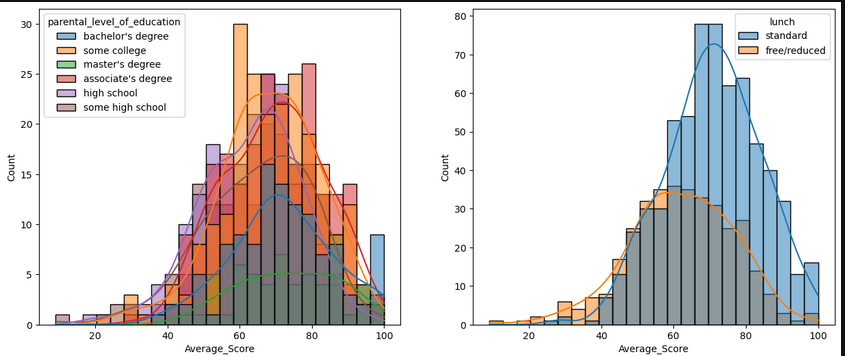

## Q4. Describe the process of feature engineering in the context of the student performance data set. How did you select and transform the variables for your model?


In [5]:
df_stud = pd.read_csv('stud.csv')

df_stud.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Finding missing data

In [3]:
df_stud.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

#### Conclusion: 

* No missing value present in any feature.

#### Finding Duplicate Data:

In [5]:
df_stud.duplicated().sum()

0

#### Conclusion: 

* No duplicate value present in the dataset.

#### Statistics of the Nemerical features of the dataset

In [6]:
df_stud.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Insights:

1. Average Score of all the students: 67.77
2. Student with lowest marks is 27 with a average of 9.
3. Highest marks obtained by a student is 300 with an average of 100 -- excellent result.
4. Lowest marks in a subject is 0 and it is in math subject.

#### Data Preparation with New Feature

In [3]:
# create a new column named 'Average_Score' in the dataset

df_stud['Total_Score'] = df_stud['math_score']+df_stud['reading_score']+df_stud['writing_score']
df_stud['Average_Score'] = df_stud['Total_Score']/3  # as 3 type if score

df_stud.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_Score,Average_Score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


#### Insights through Data Visualization

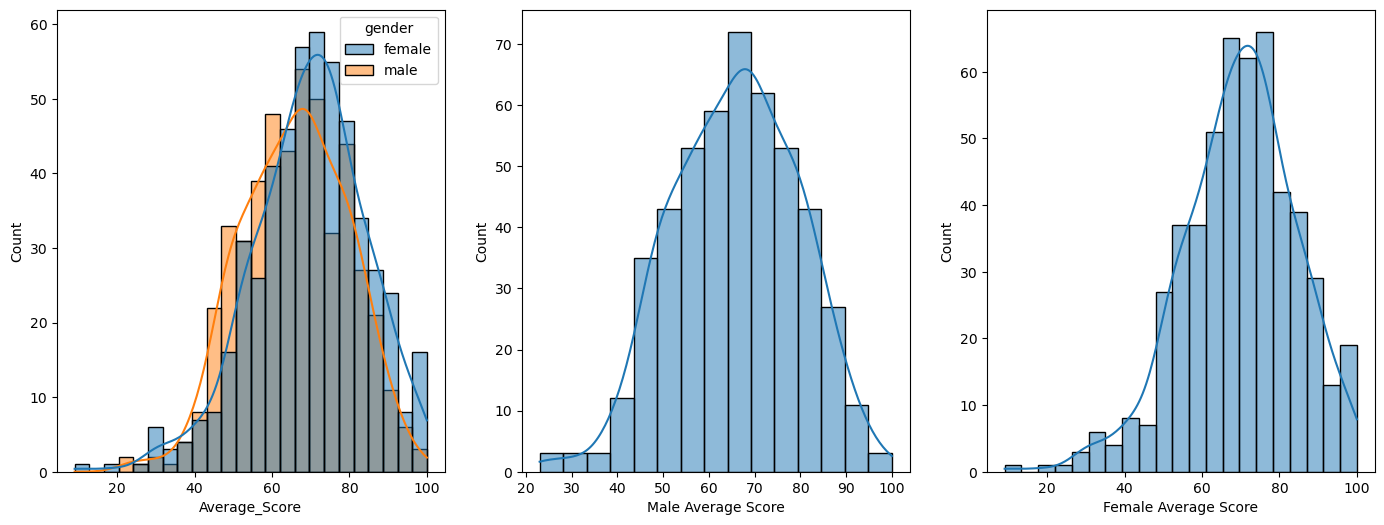

In [10]:
plt.figure(figsize=(17,6))
plt.subplot(1,3,1)
sns.histplot(data=df_stud, x='Average_Score', kde=True, hue='gender')
plt.subplot(1,3,2)
sns.histplot(data=df_stud[df_stud['gender']=='male'], x='Average_Score', kde=True)
plt.xlabel("Male Average Score")
plt.subplot(1,3,3)
sns.histplot(data=df_stud[df_stud['gender']=='female'], x='Average_Score', kde=True)
plt.xlabel("Female Average Score")
plt.show()

In [11]:
df_stud['Average_Score'][df_stud['gender']=='male'].describe()

count    482.000000
mean      65.837483
std       13.698840
min       23.000000
25%       56.000000
50%       66.333333
75%       76.250000
max      100.000000
Name: Average_Score, dtype: float64

In [12]:
df_stud['Average_Score'][df_stud['gender']=='female'].describe()

count    518.000000
mean      69.569498
std       14.541809
min        9.000000
25%       60.666667
50%       70.333333
75%       78.666667
max      100.000000
Name: Average_Score, dtype: float64

#### Insights from above:

1. Both in the graph and in the data, you can see female average score is greater than the male average score.
2. Female average Score: 69.56 where as male average score is 65.83. But one notable thing to notice is the number of male data point is 482 where as number of female data point is 518. So, number of male is 36 less than the number of female.


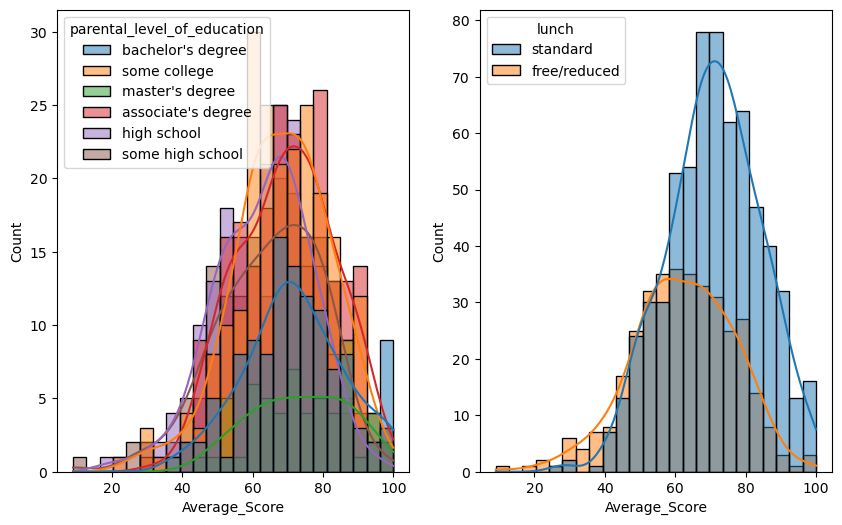

In [18]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.histplot(data=df_stud,x='Average_Score',kde=True, hue='parental_level_of_education')
plt.subplot(1,2,2)
sns.histplot(data=df_stud,x='Average_Score',kde=True, hue='lunch')
plt.show()

#### Insights from Above:

* Standard lunch improves the Score for Students
* Higher the Parent's educational degree, better the Student's marks.

#### <b>How did you select and transform the variables for your model?</b>

   I used data of the 'math_score' , 'reading_score' & 'writing_score' columns to calculate the 'Average_Score' of the students and made it as target feature.


In [6]:
df_stud['Total_Score'] = df_stud['math_score']+df_stud['reading_score']+df_stud['writing_score']
df_stud['Average_Score'] = df_stud['Total_Score']/3  # as 3 type if score

df_stud.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_Score,Average_Score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


## Q5. Load the wine quality data set and perform exploratory data analysis (EDA) to identify the distribution of each feature. Which feature(s) exhibit non-normality, and what transformations could be applied to these features to improve normality?


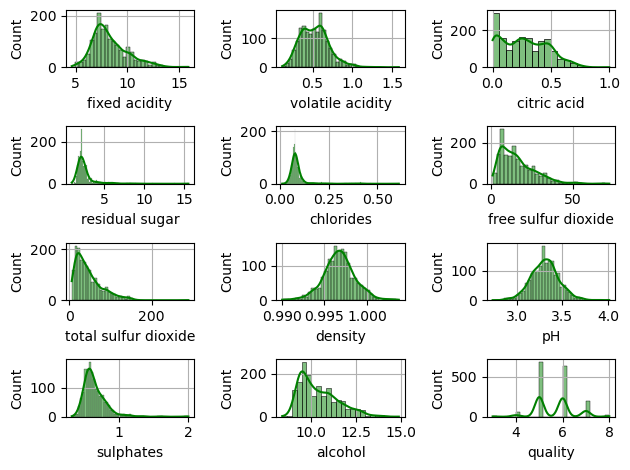

In [12]:
for i,col in enumerate(list(df_wine.columns)):
    plt.subplot(4,3,i+1)
    sns.histplot(df_wine[col], color='g', kde=True)
    plt.grid()
    plt.tight_layout()

#### <b>Which feature(s) exhibit non-normality?</b>

Except for 'density' & 'pH', all the other features have right skewed distribution.

#### <b>What transformations could be applied to these features to improve normality?</b>

As the right skewness is moderate on most of the features, so "Square Root" Transformation will be best in this case.


Source: https://anatomisebiostats.com/biostatistics-blog/transforming-skewed-data/

## Q6. Using the wine quality data set, perform principal component analysis (PCA) to reduce the number of features. What is the minimum number of principal components required to explain 90% of the variance in the data?

In [5]:
## Scale the data before applying PCA

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_wine_df = pd.DataFrame(scaler.fit_transform(df_wine), columns=list(df_wine.columns))

scaled_wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4


In [9]:
## Apply PCA to retain 95% of the variance of the dataset.

from sklearn.decomposition import PCA

pca = PCA(n_components=0.90) # 95% of variance

reduce_wine_df = pd.DataFrame(pca.fit_transform(scaled_wine_df), columns=pca.get_feature_names_out())

reduce_wine_df.head()

,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7
0,-0.308010,-0.198750,-0.157373,0.083623,-0.002606,0.053558,-0.053796,-0.066242
1,-0.265056,-0.237308,0.057130,0.098049,0.061870,-0.109040,0.174190,0.005176
2,-0.222379,-0.191181,-0.065895,0.053514,0.024600,-0.054957,0.099695,0.007149
3,0.424268,-0.057361,0.042600,-0.024394,-0.072649,-0.106613,-0.116807,-0.032717
4,-0.308010,-0.198750,-0.157373,0.083623,-0.002606,0.053558,-0.053796,-0.066242


#### <b>What is the minimum number of principal components required to explain 90% of the variance in the data?</b>

Minimum number of principal components required to explain 90% of the variance in the data is 7.